<a href="https://colab.research.google.com/github/mickeykubo/analytics_book/blob/master/matplotlib1_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python言語によるビジネスアナリティクス
## 実務家のための最適化，統計分析，機械学習（近代科学社）

## 可視化モジュールmatplotlib 

教科書ではmatplotlibの基本的な使用法を解説しているが，ここではpandasから直接描画する方法について述べる．

例題として用いるのはiris（アヤメ）のデータである．

まずはpandasを用いてデータを読んでおく．


```
%matplotlib inline
```
としておくと，描画が画面にすぐに表示されるようになる．


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

df = pd.read_csv('http://logopt.com/data/iris.data', names=['sepal length','sepal width','petal length','petal width', 'class'])
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## ヒストグラム

まずはヒストグラム（histgram, 度数分布表）を描画してみる．

ヒストグラムは数値データの分布の概要を知る際に便利である．

pandasのデータフレームの**hist**メソッドを用いる．

引数**bins**でビンの数（x軸の区分数）を指定できる．（色々変えて試してみよう．規定値は $10$ である．）

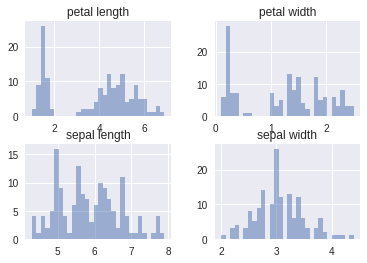

In [5]:
df.hist(alpha=0.5, bins=30);

### 問題

http://logopt.com/data/SATGPA.csv データを読み込み，2種類のSATの成績とGPAのヒストグラムを描画せよ．
また，引数のalphaとbinsを色々変えてみよ．

### 問題

以下のように読み込んだポケモンのデータフレームを用いて，攻撃力(Attack)，守備力（Defense)のヒストグラムを描画せよ．
（ヒント：データフレームから一部の列を切り出す方法については，pandasの練習問題を参考にせよ．）

In [6]:
pokemon = pd.read_csv("http://logopt.com/data/poke.csv",encoding="utf-8",index_col=0)
pokemon.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Japanese
#,,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,フシギダネ
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,フシギソウ
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,フシギバナ
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,フシギバナ・メガ進化
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,ヒトカゲ


## 散布図

散布図（scatter plot)は，2つの数値データの関係を知る際に便利である．

pandasのデータフレームの**plot.scatter**メソッドを用いる．

引数の**x**と**y**で $x,y$ 軸に使用するデータ（データフレームの列名）を指定する．

ここでは'がく片長 'sepal length'と花びら長 'petal length'の関係を図示してみる．

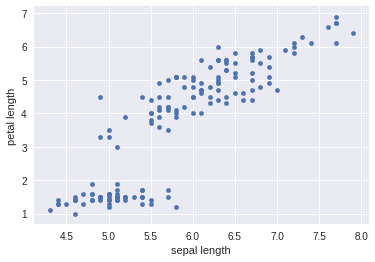

In [7]:
df.plot.scatter(x='sepal length', y= 'petal length');

### 問題
http://logopt.com/data/Diamond.csv からダイアモンドの価格データを読み込み，カラット"carat"と価格 "price" の散布図を描け．

## 問題

ポケモンのデータフレームに対して，攻撃力(Attack)，守備力（Defense)の関係を散布図に描画せよ．

（ヒント：データフレームから一部の列を切り出す方法については，pandasの練習問題を参考にせよ．）

## 他の図

pandasのデータフレームの**plot**の中には他にも様々な描画メソッドが含まれている．

色々試してみよう．

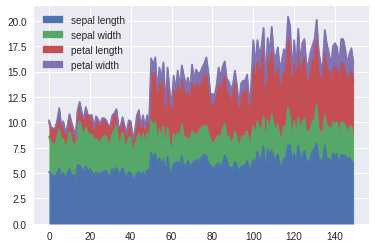

In [8]:
df.plot.area(); #m面積図

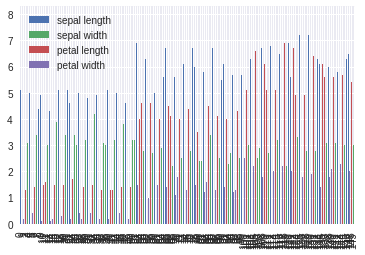

In [9]:
df.plot.bar(); #棒グラフ

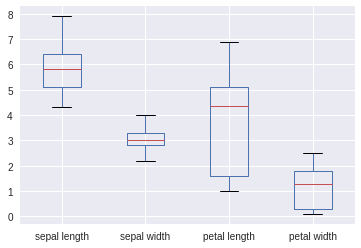

In [10]:
df.plot.box();#箱ひげ図

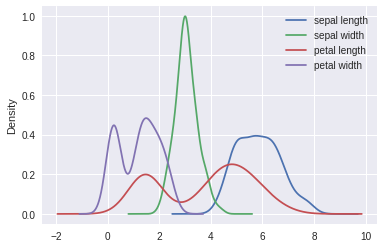

In [11]:
df.plot.density();#カーネル密度推定（kdeと同じ）

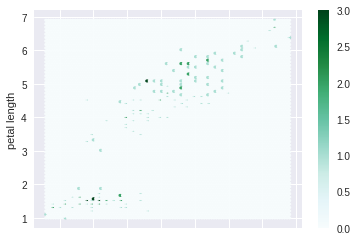

In [12]:
df.plot.hexbin(x='sepal length', y= 'petal length'); #6角形格子図（散布図と同様に，x,y軸を入れる．）

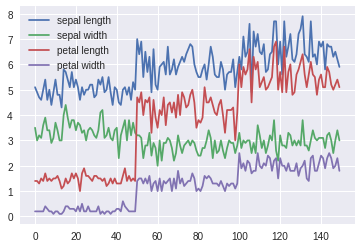

In [13]:
df.plot.line();#線グラフ df.plot()でも同じ

## 問題

ポケモンのデータを自分なりに可視化せよ．その際，どの列に対して，どの図を選択すれば良いか考え，考察とともにレポートせよ．

## 多次元データ 1 並行座標図

散布図では3次元までの図を可視化できる（3次元の場合の方法については教科書参照）が，4次元以上だと人間の目では無理だ．

多次元データを可視化するための方法として**並行座標図**がある．

これは散布図の $y$ 軸を $x$ 軸と並行にしたものである．複数の $y$ 軸があっても大丈夫だが，あまり多いとよく分からなくなる．

pandasでは**plotting**（古いバージョンだと**tools.plotting**）にある**parallel_coordinates** 関数を用いて並行座標図を描画できる．

第1引数はデータフレームであり，第2引数は分けて描画したいクラスを表す列名を与える．

並行座標図は，比例関係は平行な直線で，反比例関係は1つの点で交わる直線群で描画する．

例として，$x= 0,1,2, \ldots,9$，$y=2x$, $z=10-x$ を描画してみよう．

In [0]:
from pandas.plotting import parallel_coordinates

In [15]:
data = []   # x,y,zを入れたリストを作成
for i in range(10):                    
    row = [ i, 2*i, 10-i, 'dummy' ] #クラス名を指定するためにダミーの列を最後に追加
    data.append( row )
testdf = pd.DataFrame(data)
testdf.head()

,0,1,2,3
0,0,0,10,dummy
1,1,2,9,dummy
2,2,4,8,dummy
3,3,6,7,dummy
4,4,8,6,dummy


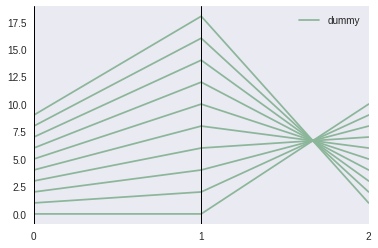

In [16]:
parallel_coordinates(testdf,3); #ダミーの列の名前は 3 

## 問題

1. iris（アヤメ）のデータフレームをアヤメの種類 'class' ごとに並行座標図に描画せよ．

2. ポケモンデータを並行座標図で描画せよ．
ただし，伝説ポケモンか否か（Legendary)でクラス分けを行い，軸としては体力(HP)，攻撃力(Attack)，守備力(Defense)を用いよ．


## 多次元データ 2

多次元データを可視化するためのもう1つの方法として**Andrew曲線**がある．

これは．多次元データ $x_1,x_2,\ldots$ をフーリエ曲線

$$
f_x(t) = \frac{x_1}{\sqrt 2} + x_2 \sin(t) + x_3 \cos(t) + x_4 \sin(2t) + x_5 \cos(2t) + \cdots
$$

で変換し，$-\pi < t < \pi$ の間に描画したものである．

pandasでは**plotting**（古いバージョンだと**tools.plotting**）にある**andrews_curves** 関数を用いて並行座標図を描画できる．

第1引数はデータフレームであり，第2引数は分けて描画したいクラスを表す列名を与える．

例として，$x= 0,1,2, \ldots,9$，$y=2x$, $z=10-x$ を描画してみよう．

In [0]:
from pandas.plotting import andrews_curves

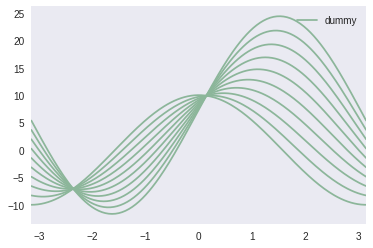

In [18]:
andrews_curves(testdf, 3);

## 問題

1. アヤメ(iris)データをアヤメの種類 'class' ごとにAndrew曲線で描画せよ．

2. ポケモンデータをAndrew曲線で描画せよ．
ただし，伝説ポケモンか否か（Legendary)でクラス分けを行い，軸としては体力(HP)，攻撃力(Attack)，守備力(Defense)を用いよ．

# データ解析用描画モジュール seaborn 

seabornを用いることによって，さらに簡単にデータ解析ができ，描画も綺麗になる．

まずはseabornモジュールを**sns**という別名で読み込んでおく．


In [0]:
import seaborn as sns
%matplotlib inline

## ヒストグラム

seabornでヒストグラム（histgram, 度数分布表）に対応するものは**displot**（distribution plot）だ．

例としてiris（アヤメ）のデータの「がく片長」('sepal length')を描画してみる．

引数としては，以下のものがあるので，色々試してみよう．

* bins: ビンの数
* kde: カーネル密度推定の有無
* rug: データの位置(敷物:rug)の有無

In [20]:
df = pd.read_csv('http://logopt.com/data/iris.data', names=['sepal length','sepal width','petal length','petal width', 'class'])
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


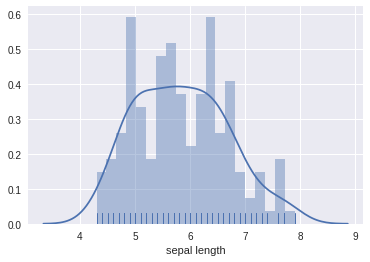

In [21]:
sns.distplot(df['sepal length'], bins=20, rug=True, kde =True);

### 問題

http://logopt.com/data/SATGPA.csv データを読み込み，GPAの分布をdistplotを用いて描画せよ．

## 散布図

seabornで散布図に対応するものは**jointplot**だ．おまけとして分布も表示される．

引数としては，$x,y$ と $data$ の他に種類を表す**kind**がある．

kindは以下のものがとれるので，色々試してみよう．

*  "scatter"：普通の散布図
* "reg" : 回帰分析
* "resid" : 回帰の残差
* "kde" : カーネル密度推定
* "hex" : 6角形格子 

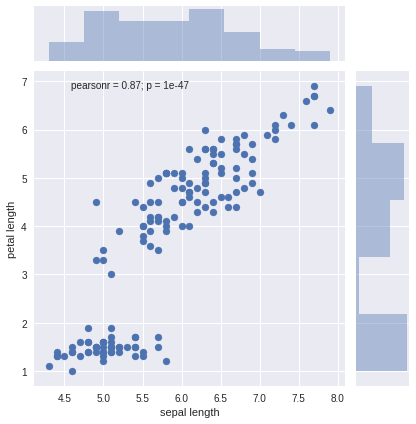

In [22]:
sns.jointplot( x='sepal length', y='petal length', data=df,  kind='scatter');

データフレームに含まれる複数の列間の散布図を一度に描画するには**pairplot**を用いる．

引数として**hue**（色調）をとることができ，色を変えたい列名（以下の例ではアヤメの種類('class'）を指定して描画している．


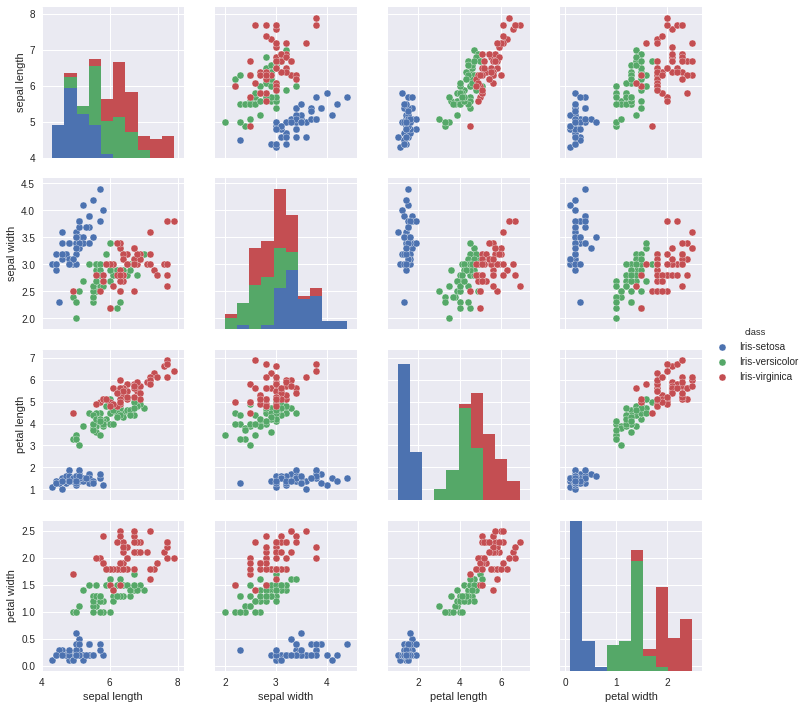

In [23]:
sns.pairplot(df, hue='class');

### 問題
1. http://logopt.com/data/SATGPA.csv データを読み込み，MathSATとGPAの関係をjointplotを用いて描画せよ．
2. http://logopt.com/data/SATGPA.csv データを読み込み，MathSAT, VerbalSAT, GPAの相互関係をpairplotを用いて描画せよ．

## 回帰プロット

seabornでは統計モジュール**statsmodels**を用いた回帰分析の結果を描画することができる．

カテゴリーデータ別の回帰を行いたい場合には，FacetGrid（教科書参照）を用いるのだが，**lmplot**は回帰の結果をFacetGridで表示してくる優れものである．

例として教科書79ページにあるtipsデータを用いる．

FacetGridでは行(row)と列(col)を表すカテゴリーデータを引数で指定できる他に，色調(hue)も用いることができる．

以下の例では，tipsデータに対して支払総額（'total_bill'）とチップ（'tip'）の関係を，
行に喫煙者か否か（row='smoker'），列に性別（col='sex'），色調に昼食か夕食か（hue='time')を設定して分析する．


In [24]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


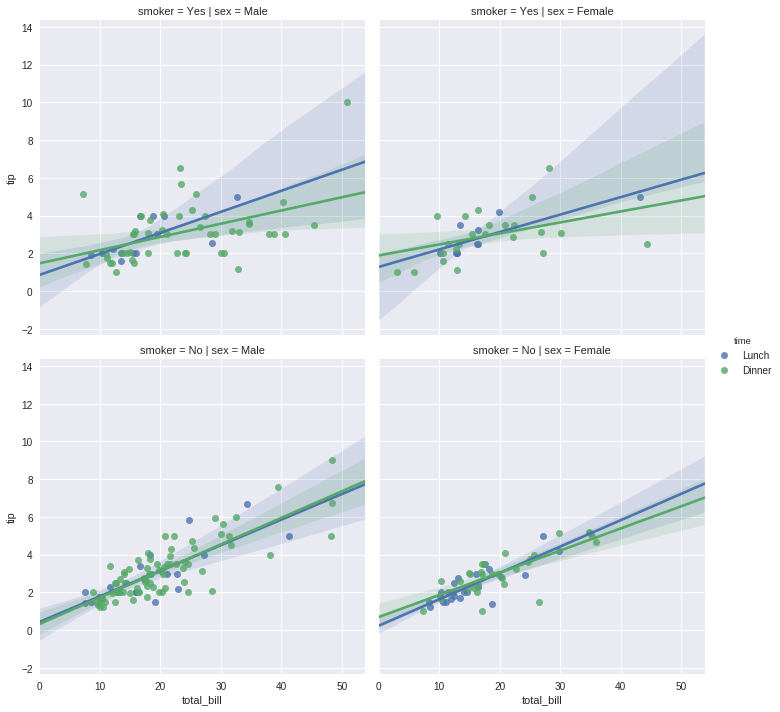

In [25]:
sns.lmplot(x='total_bill', y='tip', data=tips, row='smoker', col='sex', hue='time');

## カテゴリーデータの分析

カテゴリーデータ別に集計したい場合には，**factorplot**を用いると便利だ．

引数は以下の通り．

* x: x軸
* y: y軸
* data: データフレーム
* row: 行名
* col: 列名
* hue: 色調
* kind: グラフの種類 (point, bar, count, box, violin, strip)
* split: バイオリン図(violin：箱ひげ図の拡張)の場合だけ有効で，Trueのとき左右に色調を分けて描画する．

以下の例では，tipsデータに対し，日ごと(x)のチップ（y)を喫煙者か否か（row='smoker'），性別（col='sex'），
昼食か夕食か（hue='time'）ごとにバイオリン図で描画している．

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:637: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data[hue_mask])
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:885: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data[hue_mask])
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:905: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


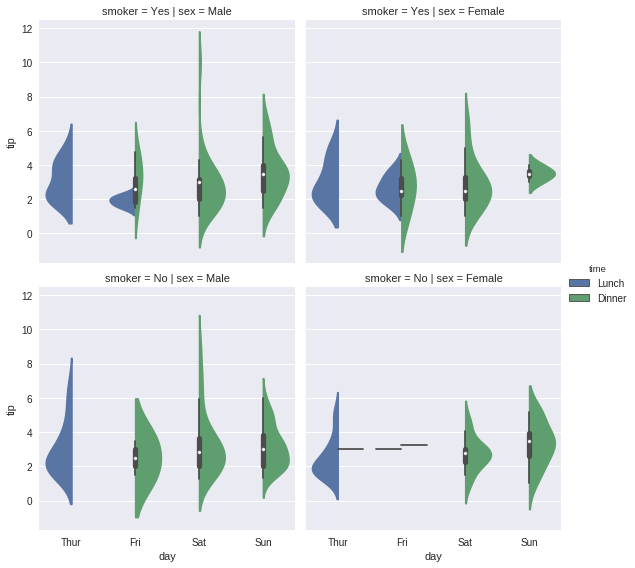

In [26]:
sns.factorplot(x='day', y='tip',  data=tips, row='smoker', col='sex', hue='time', split=True, kind='violin');

### 問題

1. titanicデータ（教科書82ページ）を読み込み，運賃(fare）と生存確率(survived)のロジスティック回帰を，性別(sex)ごとに行え．
（ヒント：ロジスティック回帰を行うには，lmplotの引数のlogisticをTrueにする．）

2.  titanicデータ（教科書82ページ）を読み込み，客室クラス(class）と性別(sex)ごとの生存確率(survived)を集計した結果を描画せよ．

In [0]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
